In [6]:
import tensorflow as tf
import os
import keras
import numpy as np

from keras import backend
#from keras.datasets.cifar import load_batch
#from keras.utils.data_utils import get_file
import matplotlib.pyplot as plt

# isort: off
from tensorflow.python.util.tf_export import keras_export

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

In [3]:
print(x_train[500:1001].shape)

(501, 32, 32, 3)


In [4]:
import cv2
import numpy as np

def convert_gray(xtrain):
    xtrain_grayed = []
    for i in range(len(xtrain)):
        gray_image = cv2.cvtColor(xtrain[i], cv2.COLOR_RGB2GRAY)
        xtrain_grayed.append(gray_image)

    # Convert the list to a NumPy array
    xtrain_grayed = np.array(xtrain_grayed)

    return xtrain_grayed

# Example usage:
# Assuming 'xtrain' is the CIFAR dataset after splitting

# Perform grayscale conversion
xtrain_grayed = convert_gray(x_train)

# Check the shape of the grayscale dataset
print("Shape of xtrain_grayed:", xtrain_grayed.shape)

# Save xtrain_grayed to a new file or use it further as needed
# For example, to save to a .npy file:
np.save('xtrain_grayed.npy', xtrain_grayed)



Shape of xtrain_grayed: (50000, 32, 32)


[6]


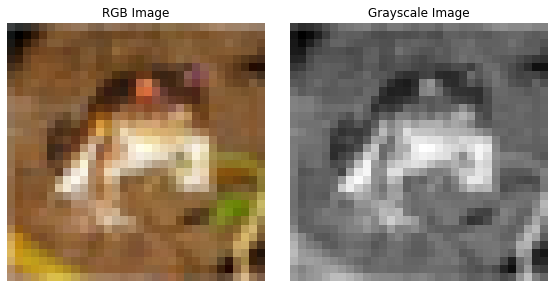

In [9]:
i = 0


print(y_train[i])

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Plot the RGB image on the first subplot
axes[0].imshow(x_train[i])
axes[0].set_title('RGB Image')
axes[0].axis('off')  # Hide the axis for the first subplot

# Plot the grayscale image on the second subplot
axes[1].imshow(xtrain_grayed[i], cmap='gray')  # Display in grayscale
axes[1].set_title('Grayscale Image')
axes[1].axis('off')  # Hide the axis for the second subplot

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [10]:
print(xtrain_grayed[0].shape)

(32, 32)


In [11]:
from sklearn.model_selection import train_test_split

xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x_train, y_train,stratify=y_train,random_state = 12345, test_size=0.1)

In [12]:
xtest1[0-500].shape
ytest1.shape

(5000, 1)

In [13]:
def apply_hog_descriptor(images_array):
    hog_features_list = []

    for i in range(images_array.shape[0]):
        image = images_array[i]

        # Convert the image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

        # Calculate HOG features
        features = hog(gray_image, orientations=9, pixels_per_cell=(8, 8),
                       cells_per_block=(3, 3))

        hog_features_list.append(features)

    # Convert the list of features to a NumPy array
    hog_features_array = np.array(hog_features_list)

    return hog_features_array

# Example usage:
# Assuming 'images_data' is the NumPy array with images of shape (5000, 32, 32, 3)

# Apply HOG descriptor to the array of images
hog_features = apply_hog_descriptor(x_train)
hog_features_test = apply_hog_descriptor(x_test)

# Check the shape of the resulting HOG features array
print("Shape of HOG features:", hog_features.shape)

Shape of HOG features: (50000, 324)


In [ ]:
from sklearn.svm import SVC

s = SVC(verbose=0)
s.fit(hog_features,y_train)
ypred = s.predict(hog_features_test)
#yscores = s.predict_proba(xtest)
from sklearn.metrics import accuracy_score
print(accuracy_score(ypred,y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6266
